# Import

In [26]:
import pandas as pd 
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import math

# pathCustom = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/ImageProcessing',
#             '/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW/SignalProcessing']
# for ipath in pathCustom:
#     if not(ipath in sys.path):
#         print(f'Adding pa\th:{ipath}')
#         sybs.path.append(ipath)

# folderProj = sys.path.getcwd()
folderProj = '/Users/pannawis/Projects/09_OCR_micro/ESP32CAM_OCR_SW'
# folderProj = os.path.dirname(os.path.abspath(__file__))
print(folderProj)
# folderProj = ['/Users/pannawis/Projects/01_SmartMeter/SmartPowerMeter_SW']
if not(folderProj in sys.path):
    print(f'Adding project path...')
    sys.path.append(folderProj)

# import wedoimage as wedoimg
# from wedoimage import*
import ImageProcessing as wedoimg
# import SignalProcessing as wedosig

folderImg = os.path.join(folderProj, 'images')

/Users/pannawis/Projects/09_OCR_micro/ESP32CAM_OCR_SW


# List file

In [27]:
print('Listing file...')
folderLoad = os.path.join(folderImg,'binary')
listImg_abs, listFil_folder, listImg_name = wedoimg.findFile(folderLoad,'*.jpg',0)
nImgs = len(listImg_name)
# writeImg = int(input('write image ?\n>'))
# writeImg =1

countImg = -1
for pathImg in listImg_name:
    countImg = countImg + 1
    print(f'{countImg+1}/{nImgs} {pathImg}')

# nameImg = listImg_name[countImg]
# nameImgWithoutExtend = nameImg.split('.')[0]
    

Listing file...
1/2 97_cam_dl_uart_1M5.jpg
2/2 94_cam_dl_uart_1M5.jpg


# Load 

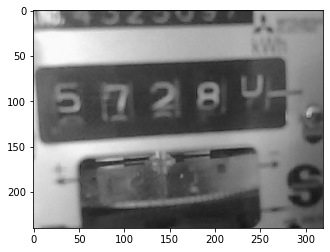

In [28]:
iload = 0
frame = cv2.imread(listImg_abs[iload],0)
wedoimg.imshowCV(frame)

ori


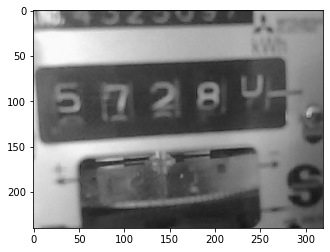

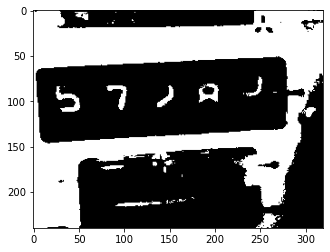

shade blur


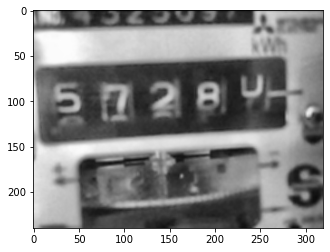

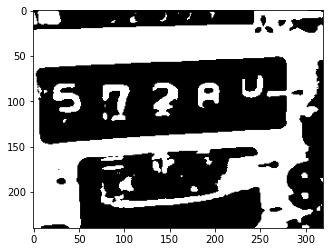

In [29]:

frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

# label_location = localize_label(img)
# label_image = extract_label(img)

# ----- extract_label -----
# Convert to grey scale 
frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
# Otsu's thresholding
ret2,frame_bin = cv2.threshold(frame_gray,0,255,cv2.THRESH_OTSU)

print('ori')
wedoimg.imshowCV(frame_gray)
wedoimg.imshowCV(frame_bin)

# Shade correction (option 2 - 1/2)
# boxMeter_grey_shade = cv2.blur(boxMeter_grey,(kernelSize_blur,kernelSize_blur))
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(7,7))
frame_gray = clahe.apply(frame_gray)

# Blur image
kernelSize_blur = 3
frame_gray = cv2.blur(frame_gray,(kernelSize_blur,kernelSize_blur))

# binary
# Otsu's thresholding
ret2,frame_bin2 = cv2.threshold(frame_gray,0,255,cv2.THRESH_OTSU)

print('shade blur')
wedoimg.imshowCV(frame_gray)
wedoimg.imshowCV(frame_bin2)

# sum row and col

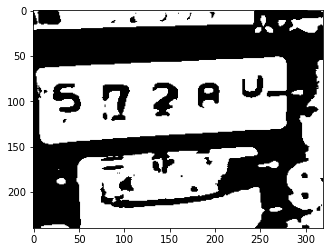

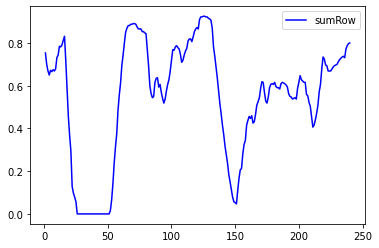

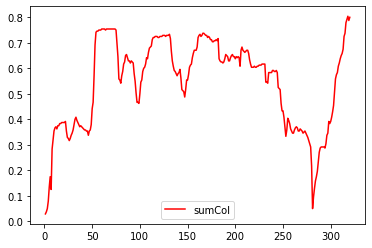

In [30]:
# sum row & col
maxIntense = 255
frame_bin_inv = (maxIntense - frame_bin2)
wedoimg.imshowCV(frame_bin_inv)

# print('row')
# wedoimg.sumPixelAndPlot(frame_bin_inv/maxIntense,maxIntense,'row')
# print('col')
# wedoimg.sumPixelAndPlot(frame_bin_inv/maxIntense,maxIntense,'col')

sumRow, sumCol = wedoimg.sumRowCol(frame_bin_inv, True)